## COMP 364: Assignment 3
### Evolutionary Algorithms

In this assignment we're going to practice some more advanced Python concepts. Namely, we'll be working with defining our own classes, File I/O, visualization, and using Biopython.

Our excuse to practice all these things will be to simulate the evolution of RNA molecules.

### The RNA World

As you may know, RNA is widely thought to be the first self replicating life-form to arise ~4 billion years ago. If you're interested in this topic check the [Wikipedia](https://en.wikipedia.org/wiki/RNA_world). The main line of reasoning for this hypothesis comes from looking at the [Central Dogma of Biology](https://en.wikipedia.org/wiki/Central_dogma_of_molecular_biology) which is the foundation for all of life. Looking at the dogma, scientists asked, which of the three molecules came first? 

DNA is very stable so it can hold genetic information intact for a long time. However, if you want to sustain life, you need to perform chemical reactions (metabolism, replication, signalling, etc.) and DNA is too stable to take on the shapes needed for these functions. For this reason, the information in the DNA gets translated into protein molecules. Protein molecules are a lot more flexible and can take on many different shapes to perform most of the chemical and physical reactions that keep us alive. However, it would be really hard to read information from proteins due to their highly complex structure. Who is left? RNA! RNA is the middleman, it takes genetic information from DNA which is then read to create a protein; so RNA can carry information. But it has also been discovered that RNA is flexible enough to perform chemical and signalling reactions. So it can play both roles. Therefore, the hypothesis is that the first form of life was an RNA molecule that could hold genetic information and carry out the reaction of replicating itself. Eventually DNA and Protein came along to make the process more efficient.

All that to say that since RNA can both carry readable information, as well as carry out the function of making copies of itself it can evolve! Evolution requires these two features in order to work. In evolutionary terms we have a genotype and a phenotype. The genotype is the genetic information; it just holds information. The functional outcome that the genotype encodes is called the phenotype. For example, the DNA sequence of the BRCA1 gene (breast cancer associated gene) would be a genotype. The manifestation of breast cancer would be a phenotype. Evolution is driven by natural selection. And natural selection acts on **phenotypes**. Phenotypes with high **fitness** are able to repoduce more and pass on their genotypes into the next generation, thereby indirectly changing genotype composition of populations. I'll walk you through more of the theory later in the notebook.


### Evolutionary Algorithms

The basic evolutionary algorithm looks something like this:

1. Take a population $G_t$ of things $s$ (in our case RNA sequences) of fixed size. The population size is also fixed, $\vert G_t \vert = N$.
2. For each sequence $s_i \in G_t$, compute $f(s_i)$. We call this the **fitness** of the sequence (how good is the phenotype? aka what is the probability that the phenotype will be able to pass on its genotype). 
3. Randomly select $N$ sequences from $G_t$ with probability proportional to $f(s_i)$. 
4. Copy each selected sequence with mutations and add it to $G_{t+1}$
5. Repeat from step 1.

Evolutionary algorithms have applications in many many fields, especially in machine learning and optimization. They're a great example of how life science concepts have influenced mathematical fields. Other examples which we may talk about later include neural networks (inspired by neuroscience), reinforcement learning (inspired by psychology), convolutional neural networks (inspired by vision), and [more](https://en.wikipedia.org/wiki/Bio-inspired_computing). [This](http://rednuht.org/genetic_cars_2/) is a **very fun** demonstration of evolutionary algorithms trying to design cars. 

The image below summarizes this process. Replace "network" with "sequence".

In [22]:
from IPython.display import Image
#This will load an image of an evolutionary algorithm
Image(url='https://quantdare.com/wp-content/uploads/2016/12/lakalgorithm.jpg')


### Building an RNA population

As we saw earlier, RNA has the nice property of posessing a strong mapping between information carrying (sequence) and function (structure). This is analogous to what is known in evolutionary terms as a genotype and a phenotype. With these properties, we have everything we need to model a population, and simulate its evolution.

#### RNA sequence-structure

We can think of the genotype as a sequence $s$ (or string!) consisting of letters/nucleotides from the alphabet $\{U,A,C,G\}$. The corresponding phenotype $\omega$ is the structure of $s$ which can be thought of as a pairing between nucleotides in the primary sequence that give rise to a 2D architecture. Because it has been shown that the function of many biomolecules, including RNA, is determined by structure this gives us a good proxy for phenotype. I.e. two different sequences that have the same shape (or structure) are likely to perform the same function.

Below is an example of what an RNA structure, or pairing, looks like.

In [25]:
#This will load an image of an RNA secondary structure
Image(url='http://www.tbi.univie.ac.at/~pkerp/forgi/_images/1y26_ss.png')

Think of an RNA sequence as a floppy string with beads (nucleotides). If we were to observe it with our eyes, it would **fold** into a shape that looks like the picture above. 

As you can see, unparied positions are forming loop-like structures, and paired positions are forming stem-like structures. It is this spatial arrangement of nucleotides that drives RNA's function. Therefore, another sequence that adopts a similar shape, is likely to behave in a similar manner. Another thing to notice is that, although in reality this is often not the case, in general we only allow pairs between $\{C,G\}$ and $\{A, U\}$.

*How do we go from a sequence to a structure?*

The cool thing about RNA is that if we know the sequence, we can fairly accurately predict how it will fold in space (which positions will be paired) using algorithms! 

The algorithm we'll be using is called the Nussinov algorithm. Unfortunately we don't have time to cover how it works so I implemented it for you. If you're interested in how it works, I give a detailed description on how it works [here](http://cgoliver.com/2017/01/15/Nussinov.html). It makes use of an important computer science concept called [recursion](https://en.wikipedia.org/wiki/Recursion) and more specifically, [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming). These topics are beyond the scope of the course but if you are curious at this point you should have all the tools you need to give a good shot at understanding these concepts.

The function to predict a structure can be found inside a `module` called `fold`. You will see that there is a file called `fold.py` and `fold.pyc`. 

You can predict a secondary structure by calling `nussinov()` with a sequence string and it will return a tuple in the form `(structure, pairs)`.

In [1]:
import random
import numpy as np

from fold import nussinov
from fold import ss_to_bp

sequence_to_fold = "ACCCGAUGUUAUAUAUACCU"
struc = nussinov(sequence_to_fold)
print(sequence_to_fold)
#print the positions that are paired as a list of tuples
print(struc[1])
#print the dot bracket representation of the structure
print(struc[0])

ACCCGAUGUUAUAUAUACCU
[(0, 19), (4, 18), (7, 17), (8, 16), (9, 14)]
(...(..(((....).))))


You will see a funny dot-bracket string in the output. This is a representation of the structure of an RNA. Quite simply, a matching pair of parentheses (open and close) correspond to the nucleotides at those positions being paried. Whereas, a dot means that that position is unpaired in the structure. From this output, you would be able to draw something like in the image above.

Feel free to play around with the input sequence to get a better understanding of the notation.

So that's enough about RNA structure prediction. Let's move on to building our populations.



# Q1: Defining an RNA (20 pts)

For this assignment we'll be dealing with three kinds of things: RNA, Populations, and Evolution. 

To make things easier, let's define a new type (or class) for each of these things.

The most fundamental of these objects is the RNA. So let's define an RNA class.
 

### Q1 (a)  `__init__` (4 pts)

Write the constructor for an RNA object. The constructor takes two positional arguments, `self`, and `seq` and one keyword argument `struc` whose default value is `None`. The constructor sets the `structure` attribute to `struc` if `struc` (a structure) is given. Otherwise it calls `nussinov()` on the given sequence to obtain the structure.

### Q1 (b)  `replicate` (8 pts)

RNA objects can replicate (i.e produce children). Write an instance method called `replicate()` that takes only `self` as a positional argument and `mutation_rate` as a keyword argument and set its default value to `0.001`. The function returns a new RNA object which is a (possibly) mutated copy of the `self` object. 

For each nucleotide in the sequence, the `mutation_rate` defines the probability with which you will randomly choose another of the 3 bases at that position in the mutated copy. If the child does turn out to have mutations (i.e. its sequene is different from its parent's) then return a new RNA object where its structure needs to be re-computed. Otherwise, return an RNA object with the same structure as its parent. (Remember the `struc=` keyword argument in the `RNA` constructor)

### Q1 (c) `compute_bp_dist` (8 pts)

Finally, we have to be able to obtain the difference between an RNA's structure and the target structure of the simulation. This will be useful in computing the fitness of a phenotype. Write an instance method called `compute_bp_distance` which takes the `self` objet and a target structure (like the tuple we saw above) as input. The method returns the number of base pairs in the current sequence that are not in the target. (Remember that the structure can also be viewed as a list of tuples, don't forget sets!)

Because all the class methods have to be defined in the same block, all your code should go in the same jupyter cell.

I defined a set called `BASES` in the global namespace with the letters representing the four RNA bases. This might come in handy. You can assume that all our sequences will always be uppercase.

In [26]:
BASES = {"A", "U", "C", "G"}

### DEFINE THE RNA CLASS HERE ###

class RNA:
    def __init__(self, seq, struc=None):
        self.sequence = seq
        if struc:
            self.structure = struc
        else:
            self.structure = nussinov(seq)
        
  
    def replicate(self, mut=0.001):
        mutated = "".join([b if random.random() > mut else random.choice(list(BASES - {b}))\
                       for b in self.sequence])
        if mutated != self.sequence:
            print("MUTATED")
            return RNA(mutated)
        else:
            return RNA(mutated, struc=self.structure)

    def compute_bp_dist(self, target):
        return len(set(self.structure[1]).symmetric_difference(set(target[1])))

In [39]:
target = ss_to_bp('(...(..(((....).))))')
print(target)
r = RNA("GGACUCAACGGGCACAGCUA")
r.structure

r.compute_bp_dist(r.structure)

('(...(..(((....).))))', [(9, 14), (8, 16), (7, 17), (4, 18), (0, 19)])


0

# Q2: Defining a Population of RNAs (20 points)

The second object we will be dealing with is populations of RNAs. Objects can live inside other objects. In this case, RNA objects will live inside of Population objects.

### Q2 (a) `___init__` (2 points)

Write a constructor for a Population. The constructor takes as input `self`, and `seqs`. The `rnas` argument is a list of `RNA` objects. Set the population attribute `rnas` to this list. 

### Q3 (b) `compute_fitness` (8 points)

This method takes as input a target structure and computes the fitness of every RNA in the Population instance's `rnas` list. The method does the following.

1. Set the attribute `rna.dist` of each rna in `rnas` to the value obtained from the function `rna.compute_bp_dist(target)`
2. Set the attribute `rna.fitness` using the following function $f(s) = e^{-d(s, T) / len(s)}$ where $d$ is the base pair distance from structure $s$ to the target $T$, $len(s)$ is the length of the sequence.
3. Obtain the total fitness of the population (the sum of all the fitnesses)
4. For each RNA, re-set the attribute `rna.fitness` to the **normalized** fitness which is: $f_{norm}(s) = \frac{f(s)}{N}$. Where $N = \sum_{s \in S} f(s)$. The reason we divide everyone's fitness by the total fitness of the population is twofold. a) Doing this means the sum of all fitnesses is 1 so we can directly treat them as probabilities. b) fitness is a relative measure (it depends on the rest of the population's fitness). The classic example is when you and your friend are being chased by a bear. Your fitness depends on your friend's fitness. In order to be considered fit you just need to be able to run faster than your friend and you will survive.
5. Set the `fitness` attribute of the population instance to the average base-pair distance of the whole population.

**A quick note on fitness and target structures.** 

In order to assign a *fitness* measure to an RNA structure, we need some "ideal" or "perfect" structure to compare it to. So the target is just any structure that we choose and for the simulation we say that the fittest structures are the ones that most closely resemble it. While this is kind of an artificial way to look at evolution, sometimes it makes sense. For example, the shape (phenotype) of many [birds](https://en.wikipedia.org/wiki/Darwin%27s_finches) beaks have evolved to be able to optimally access certain food sources. So you could say that for some specific type of food there is an ideal phenotype (beak shape) where having a beak close to it would maximize fitness.

### Q3 (c) `select` (10 points)

Write an instance method of the class Population that only takes `self` and a keyword argument `mutation_rate`. The function will return a new list of RNA objects "natural selectioned" from the current instance of Population.

1. Obtain a list of *children* RNA by selecting (aka sampling) randomly from the population. The probability of sampling an RNA is directly given by its fitness that we set in the previous question. Since population size has to stay the same every time we want to sample as many children as there were RNA in the current population. This means that we are sampling with replacement. This also makes sense because RNA with high fitness will have a higher probability of being sampled (aka yielding children) more than once which we could say means they are more effective at reproducing. Check out the documentation for `numpy.random.choice` to see how you can set the probability of sampling elements.
2. For every child that was selected, you need to mutate it to simulate replication with mutations (we are not identical to our parents). In order to make our simulations more efficient, when creating the new RNA object, only call `nussinov` on sequences whose nucleotides actually changed (recall the `mutated` attribute of RNA objects, and the `struc=` keyword argument).
3. Return a new list of new RNA objects as the offspring of the current Population.

In [20]:
### DEFINE THE POPULATION CLASS HERE ###

class Population:
    def __init__(self, seqs):
        self.rnas = seqs
        pass
        

    def compute_fitness(self, target):
        fit_tot = 0
        dist_tot = 0
        for rna in self.rnas:
            #print(self.sim.target)
            rna.dist = rna.compute_bp_dist(target)
            rna.fitness = np.exp(-rna.dist / len(rna.sequence))
            
            fit_tot += rna.fitness
            dist_tot += rna.dist
        #normalize fitness
        for rna in self.rnas:
            rna.fitness = rna.fitness / fit_tot
        #set population fitness
        self.fitness = np.mean([rna.dist for rna in self.rnas]) 
        pass
    
    def select(self, mut=0.001):
        parents = np.random.choice(self.rnas, size=len(self.rnas), replace=True,\
                                    p=[rna.fitness for rna in self.rnas])
        
        return Population([p.replicate() for p in parents])

# Q3: The Evolution class - putting it all together (15 points)

The final piece in our little hiearchy is the Evolution class. Evolution is a combination of selection (acting on Populations) and mutation (acting on RNA aka individuals). So this class is going to put it together and create a full simulation. Because we will want to create multiple simulations with different parameters it is useful to make simulations, or Evolution instances into a class so we can make multiple instances that behave differently (e.g. more generations, different population size or mutation rate, etc).


### Q3 (a) `__init__` (3 points)

Create a constructor that takes the following positional arguments: `self`, `target` and keyword: `pop_size=1000`, `mut=0.01`, `gen=25` which represent respectively the structure target as a tuple (see above), population size, mutation rate, and number of generations the simulation will run. It will set the following attributes accordingly: `target`, `mutation_rate`, `generations`, `length` (length of the RNA sequences in the simulation), `pop_size`, and `populations` which at first is an empty list that will eventually hold a population for each generation.

### Q3 (b) `first_gen` (5 points)

Create the first generation of our simulation. This function returns a Population object with a population of random sequences and with `pop_size` individuals.

### Q3 (c) `evolve` (12 points)

At this point you have all the tools you need to simulate the evolution of the population so I will not be too specific on what this needs to do but it's similar to what we did in Game of Life. This function doesn't require any positional arguments other than `self`. Roughly:

1. Create the first population
2. Compute its fitness
3. Repeat for number of generations in simulation:
    1. Create the new population from the current one with `select`
    2. Compute its fitness
    3. Set the current generation to the new one

And don't forget to update `self.populations` accordingly.

** BONUS **

For bonus points **(5 points)** add an optional keyword argument `verbose=False` to your function that when set to `True` will print a message to the user summarizing the parameters of the simulation and then nicely printing the population fitness (aka base pair distance), and current generation number at each step. 

In [22]:
### DEFINE THE EVOLUTION CLASS HERE ###

class Evolution:
    def __init__(self, target, pop_size=1000, mut=0.001, gen=25):
        self.target = target
        self.mutation_rate = mut
        self.generations = gen
        self.length = len(target[0])
        self.pop_size = pop_size
        
        self.populations = []
                
        pass    

    def firstgen(self):
        return Population([RNA("".join([random.choice(list(BASES)) for _ in range(self.length)]))\
                                              for _ in range(self.pop_size)])
    def evolve(self):
        #start first generation
        first = self.firstgen()
        first.compute_fitness(self.target)
        self.populations.append(first)
        
        current_gen = first
        for t in range(1, self.generations):
            #select sequences for next gen
            next_pop = current_gen.select(mut=self.mutation_rate)
            next_pop.compute_fitness(self.target)
            
            self.populations.append(next_pop)
            current_gen = next_pop
            print(current_gen.fitness)
        pass

In [25]:
target = nussinov('AAACCGAGAGAGUAGUAGGAGUGAUAA')
print(target)
sim = Evolution(nussinov('AAACCGAGAGAGUAGUAGGA'), pop_size=100, mut=0.05)
sim.evolve()

('(((((....).))..)(....)..)..', [(0, 24), (16, 21), (1, 15), (2, 12), (3, 11), (4, 9)])
MUTATED
8.2
MUTATED
7.97
MUTATED
MUTATED
MUTATED
7.72
MUTATED
MUTATED
7.65
MUTATED
7.48
MUTATED
7.17
MUTATED
7.02
MUTATED
MUTATED
6.89
MUTATED
6.7
MUTATED
6.55
MUTATED
MUTATED
MUTATED
6.48
5.93
MUTATED
MUTATED
5.82
MUTATED
MUTATED
5.68
MUTATED
5.59
5.3
MUTATED
MUTATED
MUTATED
MUTATED
5.22
MUTATED
MUTATED
MUTATED
5.08
MUTATED
MUTATED
MUTATED
4.97
MUTATED
MUTATED
4.98
4.97
MUTATED
4.78
4.7
MUTATED
MUTATED
4.67


You should see a nice drop in base pair distance! 

# Some Visualization (40 points)

Now we're going to do a bit of analysis and data visualization. If you are able to produce correctly you will get full marks. We will give **bonus** marks (up to 10) to those who provide some meaningful interpretation (add a markdown cell with your interpetations) of the figures they produce and choose parameters that show some interesting features of our model.

## Line plots of base pair distance vs mutation rate (12 points)

Pick a set of parameters (don't make the sequences too big (>25) because it will take very long) and run one simulation.

Make a line plot of generations (x-axis) and population base pair distance (y-axis). Label the axes and title the figure accordingly with information on the simulation parameters. **(5 points)**


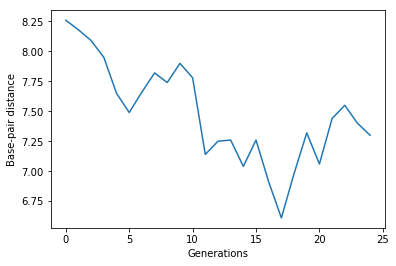

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

pops = sim.populations

plt.plot([p.fitness for p in pops])
plt.xlabel("Generations")
plt.ylabel("Base-pair distance")
plt.title(f"25 gener")
plt.show()

    

Make another line plot, this time with 3 different simulations using different mutation rates and plot the base pair distance as a function of generations. Use a legend to indicate which line has which mutation rate. **(7 points)**

12.8
12.5
12.9


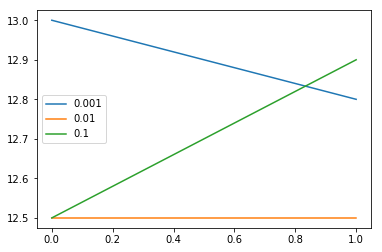

In [16]:
sims = []
muts = [0.001, 0.01, 0.1]
for m in muts :
    s = Evolution(target, mut=m, pop_size=10, gen=2)
    s.evolve()
    sims.append(s)
for i,s in enumerate(sims):
    plt.plot([p.fitness for p in s.populations], label=str(muts[i]))
plt.legend()
plt.show()

## Distribution of fitness of initial pop vs final pop (12 points)

Run a simulation with the parameters of your choosing. Make a histogram containing the distribution of fitness over all individuals in the first generation and the distribution of fitness over individuals in the final generation. Check the documetnation for matplotlib's `hist` module.

It will look something like this: (ignore the labels, this is just a picture from google)

![hist](https://i.stack.imgur.com/RdTEU.png)


In [28]:
sim = Evolution(nussinov('AAACCGAGAGAGUAGUAGGA'), pop_size=100, mut=0.001, gen=50)
sim.evolve()

7.38
7.38
7.14
7.15
6.98
6.77
6.91
6.92
7.09
6.92
6.81
6.63
6.7
6.79
6.23
6.28
6.15
6.3
6.06
5.86
5.76
5.68
5.71
5.65
5.71
5.75
5.64
5.58
5.6
5.65
5.67
5.64
5.67
5.61
5.4
5.35
5.33
5.36
5.43
5.37
5.35
5.38
5.47
5.36
5.41
5.5
5.47
5.39
5.43


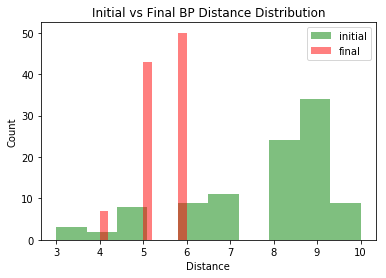

In [40]:
dists_0 = [rna.dist for rna in sim.populations[0].rnas]
dists_final = [rna.dist for rna in sim.populations[-1].rnas]

n, bins, patches = plt.hist(dists_0, facecolor='green', alpha=0.5, label="initial")
n, bins, patches = plt.hist(dists_final, facecolor='red', alpha=0.5, label="final")

plt.legend()

plt.xlabel("Distance")
plt.ylabel("Count")

plt.title("Initial vs Final BP Distance Distribution")


## Heatmap of avg distance vs mutation rate vs pop size (16 points)

Finally, we're going to experiment with two parameters so a simple line plot will not suffice. We want to see the effect of mutation rate in combination with population size on the population's **average base pair distance over all generations** let's call this quantity $\beta$. In other words, each point on our plot will be the average of the fitness of each population over all generations.

Run simulations on 3 different mutation rates and 3 different population sizes. This will produce 9 different values for $\beta$, one for each pair of mutation rate and population size setting. Once again, label axes and title accordingly.

Check the documentation for `imshow` in the matplotlib library to make heatmaps.

0.001 10
12.8
0.001 100
12.57
0.01 10
12.8
0.01 100
12.37


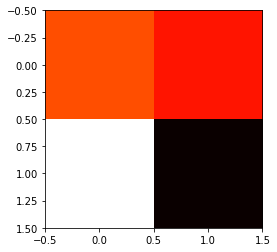

In [21]:
muts = [0.001, 0.01]
pop_sizes = [10, 100]

hmp = []

for m in muts:
    row = []
    for p in pop_sizes:
        print(m, p)
        s = Evolution(target, mut=m, pop_size=p, gen=2)
        s.evolve()
        bp = np.mean([pop.fitness for pop in s.populations])
        row.append(bp)
    hmp.append(row)
plt.imshow(hmp, cmap='hot', interpolation='nearest')